In [1]:
import sys, os

module_path = os.path.abspath(os.path.join(".."))

if module_path not in sys.path:
    sys.path.append(module_path)

# move directory
os.chdir("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load result
with open("./dataset/two-stream/test.mat", "rb") as file:
    mdat = loadmat(file)

In [3]:
snapshot = mdat["snapshot"]
E = mdat["E"]
PE = mdat["PE"]

N = mdat["N"].item()
Nt = snapshot.shape[1]
N_mesh = mdat["N_mesh"].item()
L = mdat["L"].item()
dx = L / N_mesh
tmin = mdat["tmin"][0]
tmax = mdat["tmax"][0]
dt = mdat["dt"][0].item()
ts = np.linspace(tmin, tmax, Nt)

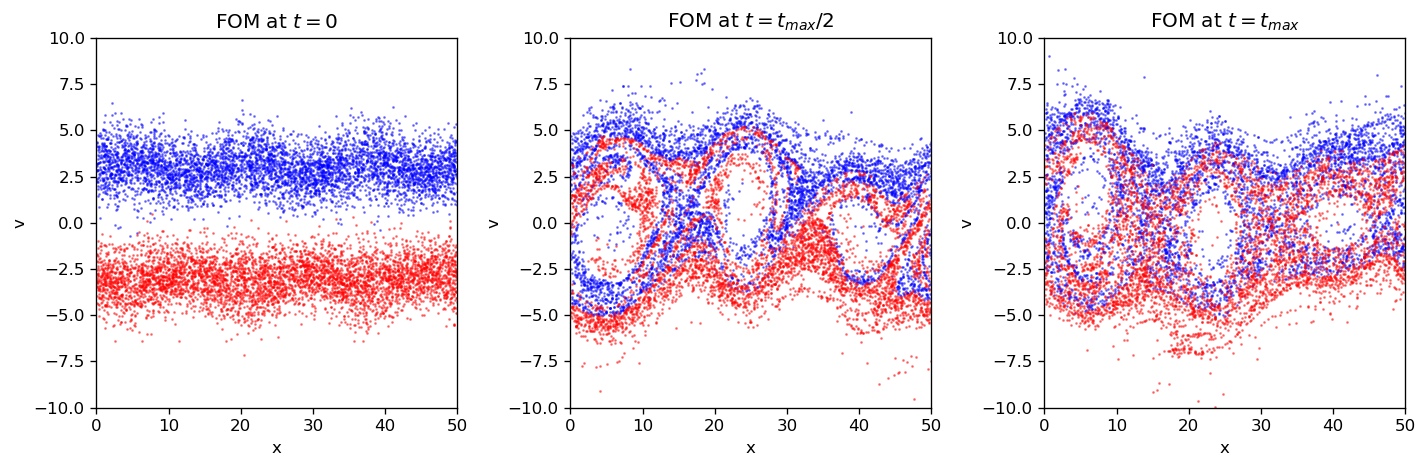

In [4]:
from src.plot import plot_two_stream_evolution

fig, axes = plot_two_stream_evolution(snapshot, None, None, None, 0, L, -10.0, 10.0)
fig

In [5]:
from src.control.objective import estimate_f, estimate_KL_divergence
from src.env.dist import TwoStream

n0 = 1.0
vmin = -20.0
vmax = 20.0
dx = L / N_mesh
dv = (vmax - vmin) / N_mesh

f = estimate_f(snapshot[:,-1], N_mesh, L, vmin, vmax, n0)

dist = TwoStream(3.0, 1.0, N, L)
state = np.concatenate([dist.get_sample()[0].reshape(-1,1), dist.get_sample()[1].reshape(-1,1)], axis = 0)
feq = estimate_f(state, N_mesh, L, vmin, vmax, n0)

kl = estimate_KL_divergence(f, feq, dx, dv)

print("KL divergence:{}".format(kl))

KL divergence:0.010223243361590275
